## 1. Load Required Libraries

In [1]:
import os

#input file_location
file_location = 'D:\Project\Course\Pacmann\Tugas\Machine Learning Process\Predictive Maintenance\Coding'

os.chdir(os.path.expanduser(file_location))

In [2]:
import src.util as utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## 2. Load Configuration File

In [3]:
config = utils.load_config()

## 3. Load Train and Test Set

In [4]:
def load_dataset_feng(config_data: dict):
    # Load every set of data
    X_train_feng = utils.pickle_load(config['train_test']['directory'] + config['train_test']["X_train_feng"])
    y_train_feng = utils.pickle_load(config['train_test']['directory'] + config['train_test']["y_train_feng"])

    X_test_feng = utils.pickle_load(config['train_test']['directory'] + config['train_test']["X_test_feng"])
    y_test_feng = utils.pickle_load(config['train_test']['directory'] + config['train_test']["y_test_feng"])

    # Return 3 set of data
    return X_train_feng, y_train_feng, X_test_feng, y_test_feng

In [5]:
X_train_feng, y_train_feng, X_test_feng, y_test_feng = load_dataset_feng(config)

## 4. Baseline Model

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a DummyClassifier with 'stratified' strategy as the baseline model
baseline_model = DummyClassifier(strategy='stratified')

# Train the baseline model
baseline_model.fit(X_train_feng, y_train_feng)

# Make predictions using the baseline model
y_pred = baseline_model.predict(X_test_feng)

# Evaluate the baseline model
accuracy = accuracy_score(y_test_feng, y_pred)
report = classification_report(y_test_feng, y_pred)

print("Baseline Model:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Baseline Model:
Accuracy: 0.5305
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.54      0.69      1932
           1       0.03      0.40      0.05        68

    accuracy                           0.53      2000
   macro avg       0.50      0.47      0.37      2000
weighted avg       0.93      0.53      0.67      2000



## 5. Modelling

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a dictionary to store the hyperparameter grids for each algorithm
hyperparameter_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100,200]},
    'AdaBoost': {'n_estimators': [50, 100, 200]}
}
 
# Define the models for each algorithm
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB()
}

best_models = {}

# Perform hyperparameter tuning and get the best models for each algorithm
for algo, model in models.items():
    if algo in hyperparameter_grids:
        param_grid = hyperparameter_grids[algo]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_feng, y_train_feng)
        best_models[algo] = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_accuracy = grid_search.best_score_
    else:
        # For Naive Bayes, there are no hyperparameters to tune
        best_models[algo] = model
        model.fit(X_train_feng, y_train_feng)
        y_pred = model.predict(X_test_feng)
        best_accuracy = accuracy_score(y_test_feng, y_pred)
        best_params = "No hyperparameters to tune."

    print(f"Algorithm: {algo}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Accuracy: {best_accuracy:.4f}\n")

# Find the best algorithm based on accuracy
best_algorithm = max(best_models.items(), key=lambda x: accuracy_score(y_test_feng, x[1].predict(X_test_feng)))[0]
print("Best Algorithm:", best_algorithm)


Algorithm: Logistic Regression
Best Hyperparameters: {'C': 10}
Best Accuracy: 0.8349

Algorithm: SVM
Best Hyperparameters: {'C': 1}
Best Accuracy: 0.8329

Algorithm: Decision Tree
Best Hyperparameters: {'max_depth': 5}
Best Accuracy: 0.8906

Algorithm: Random Forest
Best Hyperparameters: {'n_estimators': 50}
Best Accuracy: 0.8966

Algorithm: AdaBoost
Best Hyperparameters: {'n_estimators': 100}
Best Accuracy: 0.8688

Algorithm: Naive Bayes
Best Hyperparameters: No hyperparameters to tune.
Best Accuracy: 0.8215

Best Algorithm: Decision Tree


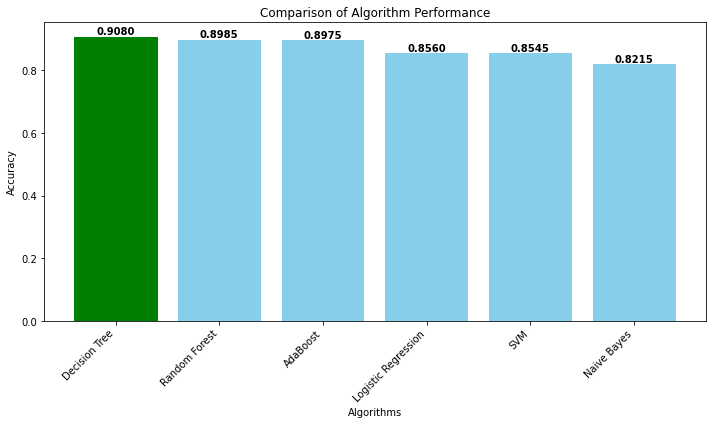

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already obtained the best_accuracy and best_models dictionary
# as computed in the previous code

# Sort the algorithms based on accuracy in descending order
sorted_algorithms = sorted(best_models.items(), key=lambda x: accuracy_score(y_test_feng, x[1].predict(X_test_feng)), reverse=True)

# Extract the algorithm names and accuracies for plotting
algorithm_names = [algo[0] for algo in sorted_algorithms]
accuracies = [accuracy_score(y_test_feng, algo[1].predict(X_test_feng)) for algo in sorted_algorithms]

# Find the index of the highest accuracy value
highest_index = np.argmax(accuracies)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithm_names, accuracies, color='skyblue')

# Highlight the highest algorithm by changing its color
bars[highest_index].set_color('green')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Performance')
plt.xticks(rotation=45, ha='right')

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Evaluation and Metrics

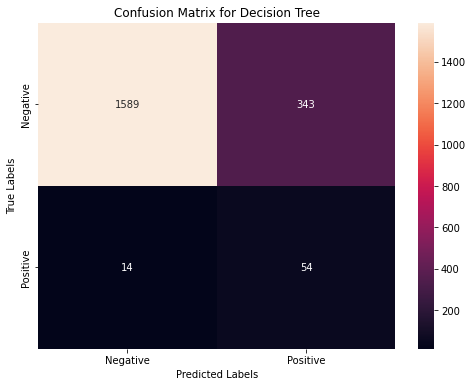

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test_feng, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for {best_algorithm}')
plt.show()

In [10]:
print(classification_report(y_test_feng, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1932
           1       0.14      0.79      0.23        68

    accuracy                           0.82      2000
   macro avg       0.56      0.81      0.57      2000
weighted avg       0.96      0.82      0.88      2000



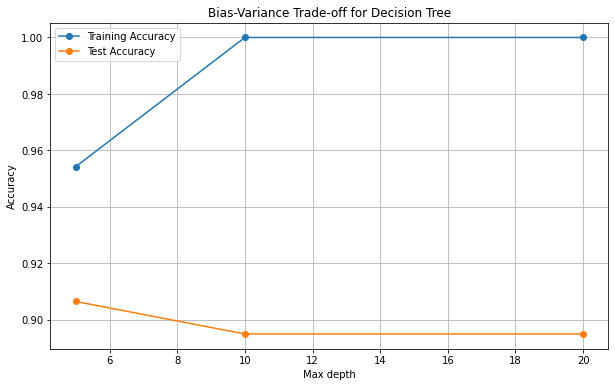

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a range of max_depth values for the Decision tree model
max_depth_values = [None, 5, 10, 20]

# Lists to store the training and test accuracies for each max_depth
train_accuracies_dt = []
test_accuracies_dt = []

# Assuming X_train_feng, y_train_feng, X_test_feng, y_test_feng are defined

for max_depth_val in max_depth_values:
    # Create the Decision Tree model with the specified max_depth value
    model_dt = DecisionTreeClassifier(max_depth=max_depth_val)

    # Fit the model on the training set
    model_dt.fit(X_train_feng, y_train_feng)

    # Predict on the training and test sets
    y_train_pred_dt = model_dt.predict(X_train_feng)
    y_test_pred_dt = model_dt.predict(X_test_feng)

    # Calculate the accuracies and store them
    train_accuracy_dt = accuracy_score(y_train_feng, y_train_pred_dt)
    test_accuracy_dt = accuracy_score(y_test_feng, y_test_pred_dt)

    train_accuracies_dt.append(train_accuracy_dt)
    test_accuracies_dt.append(test_accuracy_dt)

# Plot the bias-variance trade-off curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies_dt, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies_dt, label='Test Accuracy', marker='o')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Trade-off for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
train_accuracies_dt

[1.0, 0.9542743538767395, 1.0, 1.0]

## 6. Dump Model Object

In [15]:
utils.pickle_dump(model_dt, config['best_model']['model_path'] + config['best_model']['model_name'])